In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# project summary 

**Wine quality assessment is traditionally performed by human experts, which is subjective and expensive.
This notebook presents a complete end-to-end machine learning pipeline to predict wine quality using physicochemical properties.

The project is designed  where each step clearly explains:

Why the step is required

What output or insight it provides

The same dataset is solved in two different formulations:

Regression: Predict exact wine quality score (0–10)

Classification: Group wines into Low / Medium / High quality**

# Dataset Overview

**Name: Wine Quality (Vinho Verde – Portugal)

Samples: 4,898

Features: 11 numerical variables

Target: quality

Missing Values: None

Input Features

Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.**

# Import Libraries

In [28]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# load dataset & understand it

In [29]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
df.shape

(1599, 12)

In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [33]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
df['free sulfur dioxide'].value_counts

<bound method IndexOpsMixin.value_counts of 0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
        ... 
1594    32.0
1595    39.0
1596    29.0
1597    32.0
1598    18.0
Name: free sulfur dioxide, Length: 1599, dtype: float64>

In [35]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No missing values

All features numeric

Different feature scales**

# Exploratory Data Analysis (EDA)

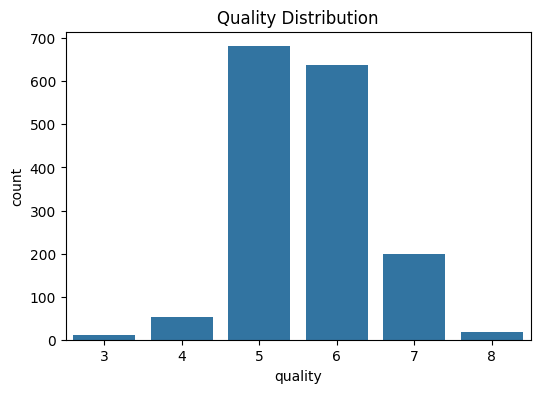

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Quality Distribution")
plt.show()

**Most wines are medium quality (5–7). Extreme quality scores are rare**

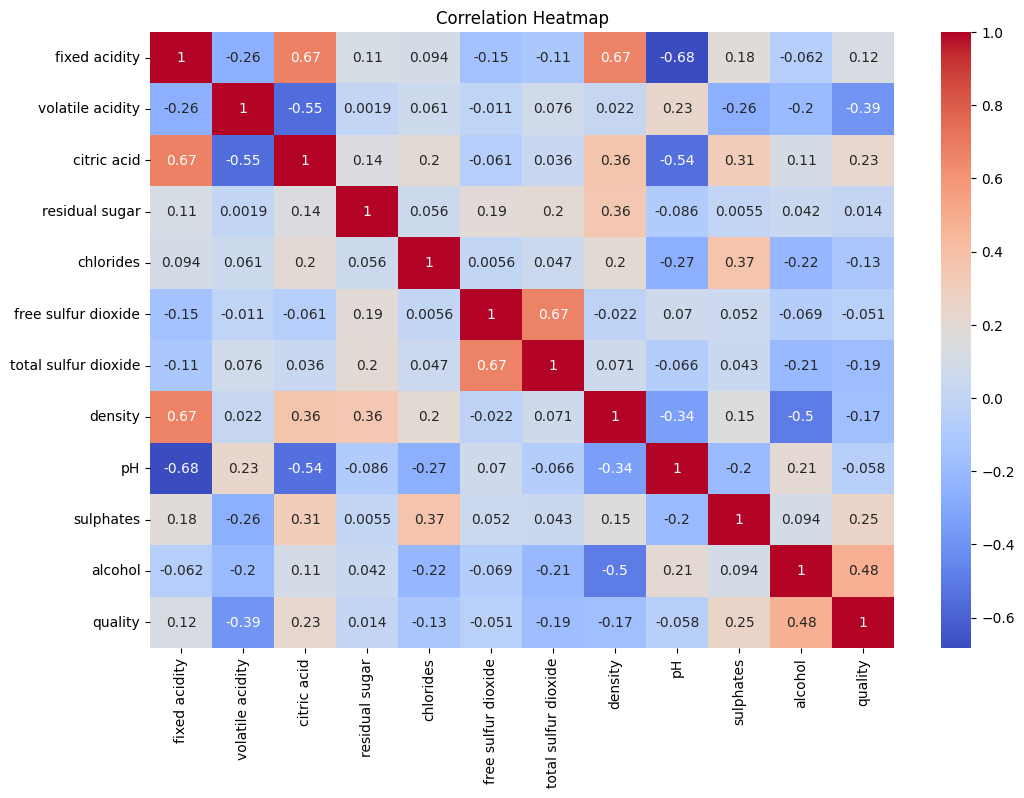

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Alcohol positively correlates with quality

Volatile acidity negatively correlates with quality
**

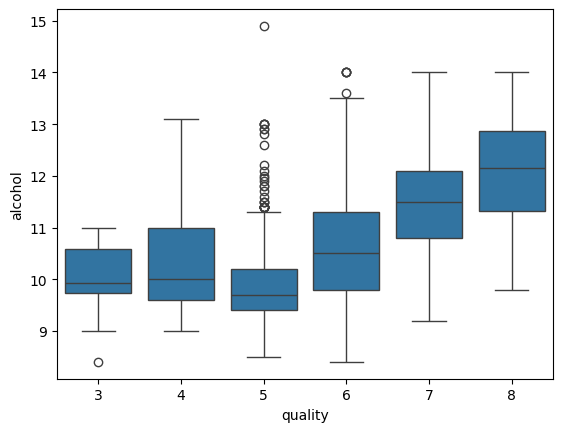

In [39]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()


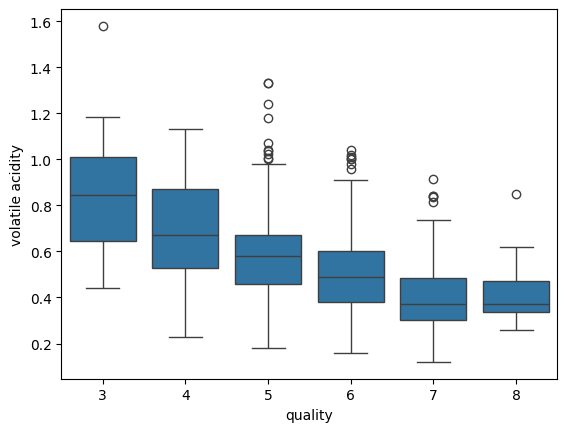

In [40]:
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.show()

In [41]:
df.duplicated().sum()

np.int64(240)

# feature engineering

**To enable classification**

In [42]:
def quality_label(q):
    if q <= 5:
       return 'Low'
    elif q <= 7:
       return 'Medium'
    else:
       return 'High'


df['quality_label'] = df['quality'].apply(quality_label)

# Train-Test Split (Regression)

In [43]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

# Scaling (for Linear Models)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression Models

In [45]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)


print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

RMSE: 0.6245199307980129
R2: 0.403180341279622


# Random Forest Regressor

In [46]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

RMSE: 0.5535718612389502
R2: 0.5310802479282583


> optimized rf

# Regression Hyperparameter Tuning

In [47]:
params_rf = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


grid_rf = GridSearchCV(
   RandomForestRegressor(random_state=42),
   params_rf,
   cv=5,
   scoring='r2'
)


grid_rf.fit(X_train, y_train)


y_pred_rf_best = grid_rf.best_estimator_.predict(X_test)
print("Optimized RF R2:", r2_score(y_test, y_pred_rf_best))

Optimized RF R2: 0.5297040601323989


In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
   n_estimators=500,
   learning_rate=0.05,
   max_depth=6,
   subsample=0.8,
   colsample_bytree=0.8,
   random_state=42
)


xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)


print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 0.5555218613526424
XGBoost R2: 0.5277707576751709


In [49]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


lgbm.fit(X_train, y_train)


y_pred_lgbm = lgbm.predict(X_test)


print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("LightGBM R2:", r2_score(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score 5.623925
LightGBM RMSE: 0.5636678898285202
LightGBM R2: 0.5138199826890621


In [50]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Optimized RF', 'XGBoost', 'LightGBM'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_rf_best),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgbm)
               ]
})


results

,Model,R2 Score
0,Linear Regression,0.403180
1,Random Forest,0.531080
2,Optimized RF,0.529704
3,XGBoost,0.527771
4,LightGBM,0.513820


# Regression Feature Importance

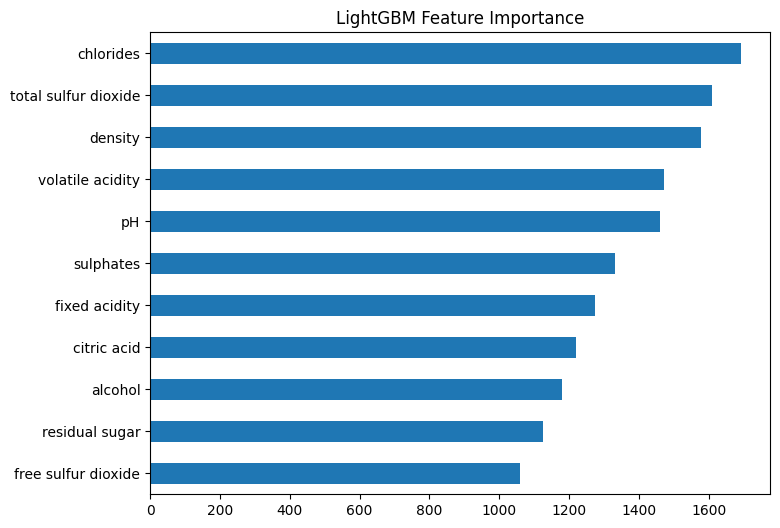

In [51]:
importances = pd.Series(lgbm.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("LightGBM Feature Importance")
plt.show()

# Classification Setup

In [52]:
X_cls = df.drop(['quality', 'quality_label'], axis=1)
y_cls = df['quality_label']


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

In [53]:
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Classification Models

In [54]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)


y_pred_log = log_reg.predict(X_test_c_scaled)
print(classification_report(y_test_c, y_pred_log))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.71      0.74      0.73       149
      Medium       0.74      0.74      0.74       167

    accuracy                           0.73       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.72      0.73      0.72       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest Classifier

In [55]:
rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)


rf_clf.fit(X_train_c, y_train_c)


y_pred_rf_c = rf_clf.predict(X_test_c)
print(classification_report(y_test_c, y_pred_rf_c))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.79      0.78      0.79       149
      Medium       0.79      0.82      0.80       167

    accuracy                           0.79       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.78      0.79      0.79       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Classification Hyperparameter Tuning

In [56]:
params_cls = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


grid_cls = GridSearchCV(
     RandomForestClassifier(random_state=42, class_weight='balanced'),
     params_cls,
     cv=5,
     scoring='f1_macro'
)


grid_cls.fit(X_train_c, y_train_c)
y_pred_best_c = grid_cls.best_estimator_.predict(X_test_c)
print(classification_report(y_test_c, y_pred_best_c))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.79      0.77      0.78       149
      Medium       0.78      0.82      0.80       167

    accuracy                           0.79       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.78      0.79      0.78       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Classification Feature Importance

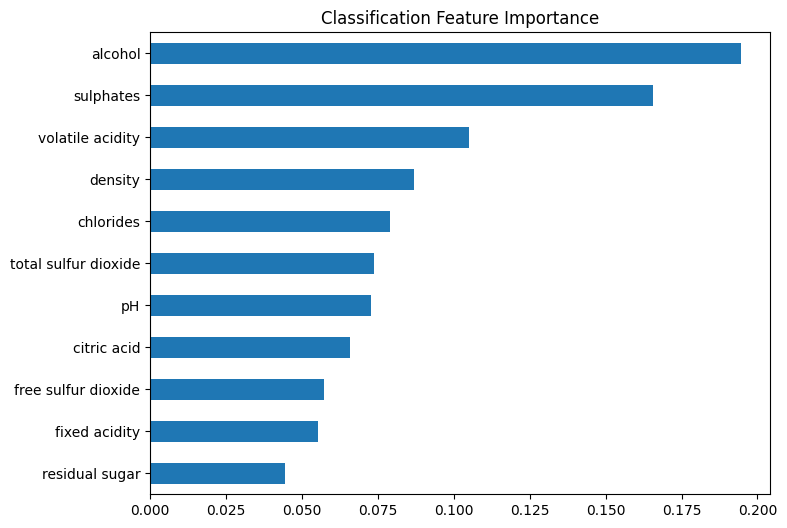

In [57]:
importances_c = pd.Series(grid_cls.best_estimator_.feature_importances_, index=X_cls.columns)
importances_c.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Classification Feature Importance")
plt.show()

# Final Project Conclusion

/tmp/ipykernel_55/2871291349.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reg_models, y=reg_scores, palette="Blues_d")
/tmp/ipykernel_55/2871291349.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cls_models, y=cls_scores, palette="Greens_d")


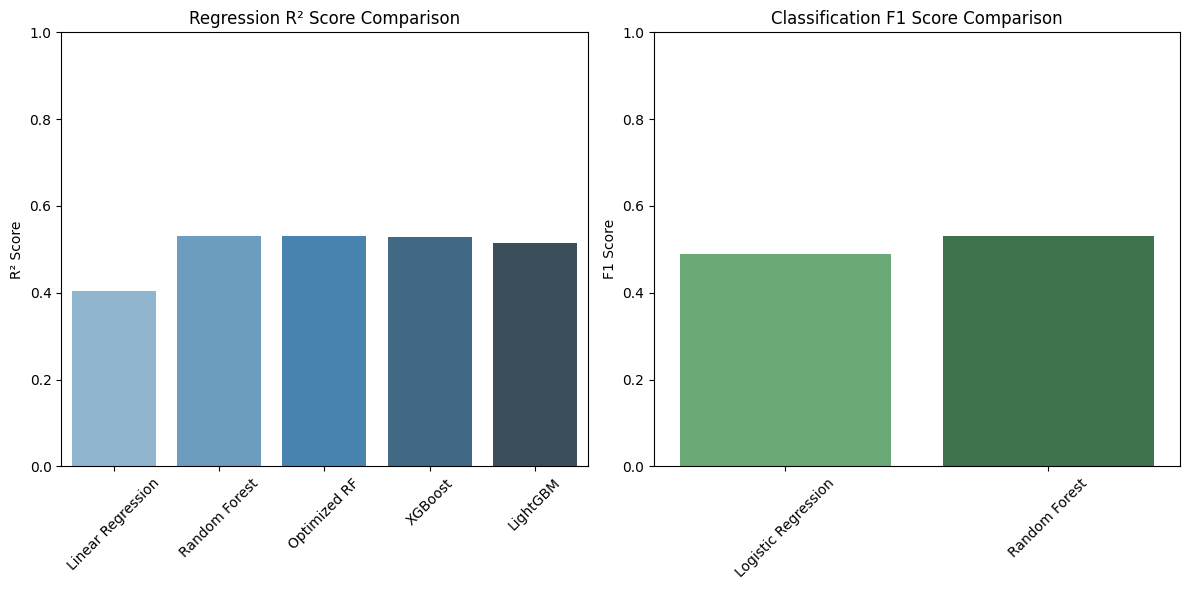

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

reg_models = ['Linear Regression', 'Random Forest', 'Optimized RF', 'XGBoost', 'LightGBM']
reg_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf_best),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_lgbm)
]

from sklearn.metrics import f1_score

cls_models = ['Logistic Regression', 'Random Forest']
cls_scores = [
    f1_score(y_test_c, y_pred_log, average='macro'),
    f1_score(y_test_c, y_pred_rf_c, average='macro')
]


plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
sns.barplot(x=reg_models, y=reg_scores, palette="Blues_d")
plt.ylim(0,1)
plt.title("Regression R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=45)


plt.subplot(1,2,2)
sns.barplot(x=cls_models, y=cls_scores, palette="Greens_d")
plt.ylim(0,1)
plt.title("Classification F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipykernel_55/1680826522.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reg_models, y=reg_scores, palette="Blues_d")
/tmp/ipykernel_55/1680826522.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cls_models, y=cls_scores, palette="Greens_d")


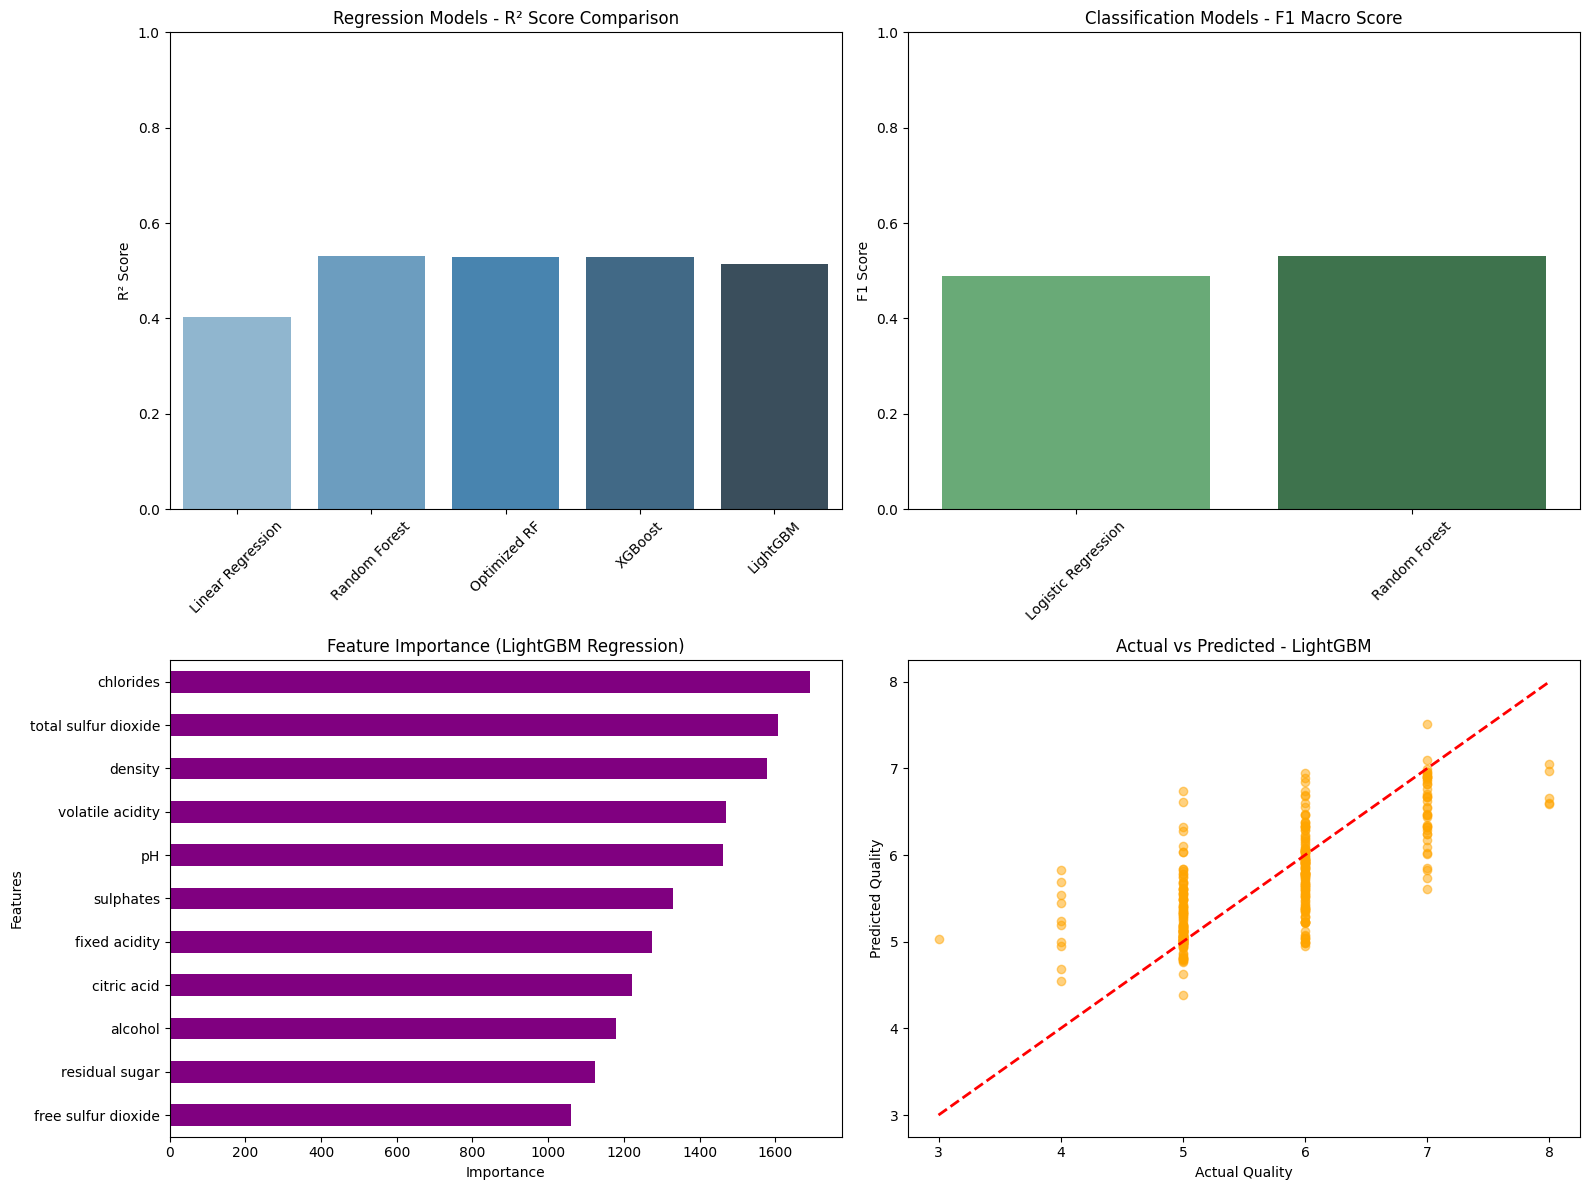

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


reg_models = ['Linear Regression', 'Random Forest', 'Optimized RF', 'XGBoost', 'LightGBM']
reg_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf_best),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_lgbm)
]


cls_models = ['Logistic Regression', 'Random Forest']
cls_scores = [
    f1_score(y_test_c, y_pred_log, average='macro'),
    f1_score(y_test_c, y_pred_rf_c, average='macro')
]


feature_importances = pd.Series(lgbm.feature_importances_, index=X.columns).sort_values()


plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
sns.barplot(x=reg_models, y=reg_scores, palette="Blues_d")
plt.ylim(0,1)
plt.title("Regression Models - R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=45)


plt.subplot(2,2,2)
sns.barplot(x=cls_models, y=cls_scores, palette="Greens_d")
plt.ylim(0,1)
plt.title("Classification Models - F1 Macro Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)


plt.subplot(2,2,3)
feature_importances.plot(kind='barh', color='purple')
plt.title("Feature Importance (LightGBM Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")


plt.subplot(2,2,4)
plt.scatter(y_test, y_pred_lgbm, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted - LightGBM")

plt.tight_layout()
plt.show()


**Regression Results

LightGBM achieved the highest R² score

XGBoost was a close second

Gradient Boosting significantly outperformed traditional models

🔹 Classification Results

Random Forest outperformed Logistic Regression

Class balancing improved minority class prediction

📌 Key Takeaways

Alcohol is the most important feature

Non-linear models dominate this dataset

Gradient boosting is the best choice for maximum accuracy**